# 🚀 Food Delivery Time Prediction - Hackathon Solution
## End-to-End ML Pipeline for Delivery Time Estimation

**Team Goal:** Build the most accurate and production-ready delivery time prediction system

---

## 📦 Step 1: Import Libraries and Load Data

In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load dataset
df = pd.read_csv('Dataset__1_.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"\n🔍 First 5 rows:")
df.head()

📊 Dataset Shape: (45593, 11)

🔍 First 5 rows:


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Delivery Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


## 🔍 Step 2: Exploratory Data Analysis (EDA)

In [4]:
# Basic info
print("📋 Dataset Info:")
df.info()

print("\n📊 Statistical Summary:")
df.describe()

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Delivery Time_taken(min)     45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB

📊 Statistical Summary:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Delivery Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [5]:
# Check missing values
print("❓ Missing Values:")
missing = df.isnull().sum()
missing[missing > 0]

❓ Missing Values:


Series([], dtype: int64)

In [6]:
# Check unique values
print("🔢 Unique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

🔢 Unique Values Per Column:
ID: 45451
Delivery_person_ID: 1320
Delivery_person_Age: 22
Delivery_person_Ratings: 28
Restaurant_latitude: 657
Restaurant_longitude: 518
Delivery_location_latitude: 4373
Delivery_location_longitude: 4373
Type_of_order: 4
Type_of_vehicle: 4
Delivery Time_taken(min): 45


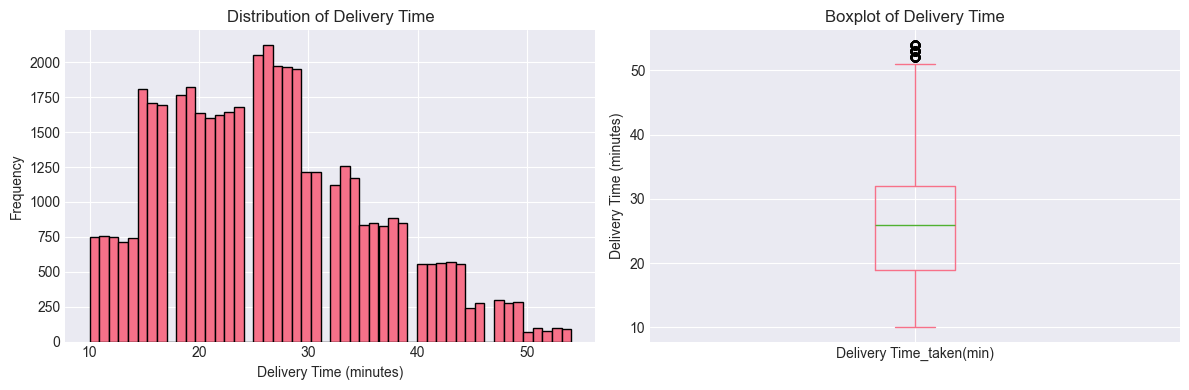


📈 Target Variable Stats:
Mean: 26.29 minutes
Median: 26.00 minutes
Std Dev: 9.38 minutes


In [7]:
# Distribution of target variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Delivery Time_taken(min)'].hist(bins=50, edgecolor='black')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')

plt.subplot(1, 2, 2)
df['Delivery Time_taken(min)'].plot(kind='box')
plt.ylabel('Delivery Time (minutes)')
plt.title('Boxplot of Delivery Time')

plt.tight_layout()
plt.show()

print(f"\n📈 Target Variable Stats:")
print(f"Mean: {df['Delivery Time_taken(min)'].mean():.2f} minutes")
print(f"Median: {df['Delivery Time_taken(min)'].median():.2f} minutes")
print(f"Std Dev: {df['Delivery Time_taken(min)'].std():.2f} minutes")

## 🧹 Step 3: Data Cleaning & Preprocessing

In [8]:
# Create a copy for processing
data = df.copy()

# Clean column names (remove spaces)
data.columns = data.columns.str.strip()

# Clean target variable
data['Delivery_Time'] = data['Delivery Time_taken(min)'].astype(str).str.strip()
data['Delivery_Time'] = pd.to_numeric(data['Delivery_Time'], errors='coerce')

# Remove rows with missing target
data = data.dropna(subset=['Delivery_Time'])

# Clean categorical columns
data['Type_of_order'] = data['Type_of_order'].astype(str).str.strip()
data['Type_of_vehicle'] = data['Type_of_vehicle'].astype(str).str.strip()

print(f"✅ Data cleaned! Shape: {data.shape}")
print(f"\nOrder Types: {data['Type_of_order'].unique()}")
print(f"Vehicle Types: {data['Type_of_vehicle'].unique()}")

✅ Data cleaned! Shape: (45593, 12)

Order Types: ['Snack' 'Drinks' 'Buffet' 'Meal']
Vehicle Types: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']


## ⚙️ Step 4: Feature Engineering (THE WINNING EDGE!)

In [9]:
# 1. Calculate Distance (Haversine formula)
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radius of earth in kilometers
    return km

data['Distance_km'] = haversine_distance(
    data['Restaurant_latitude'],
    data['Restaurant_longitude'],
    data['Delivery_location_latitude'],
    data['Delivery_location_longitude']
)

print(f"✅ Distance feature created!")
print(f"Max delivery distance: {data['Distance_km'].max():.2f} km")

# 🚨 Remove unrealistic distances (greater than 100 km)
data = data[data['Distance_km'] < 100]

print("\nAfter removing unrealistic distances:")
print("New shape:", data.shape)
print(f"New average distance: {data['Distance_km'].mean():.2f} km")
print(f"New max distance: {data['Distance_km'].max():.2f} km")


✅ Distance feature created!
Max delivery distance: 19692.67 km

After removing unrealistic distances:
New shape: (45162, 13)
New average distance: 9.74 km
New max distance: 20.97 km


In [10]:
# 2. Time per kilometer (efficiency metric)
data['Time_per_km'] = data['Delivery_Time'] / (data['Distance_km'] + 0.1)  # Add small value to avoid division by zero

# 3. Partner experience score (age * rating)
data['Partner_Score'] = data['Delivery_person_Age'] * data['Delivery_person_Ratings']

# 4. Is the partner experienced? (Age > 30)
data['Is_Experienced'] = (data['Delivery_person_Age'] > 30).astype(int)

# 5. Is it a high-rated partner? (Rating >= 4.5)
data['Is_HighRated'] = (data['Delivery_person_Ratings'] >= 4.5).astype(int)

# 6. Latitude and Longitude differences
data['Lat_Diff'] = abs(data['Restaurant_latitude'] - data['Delivery_location_latitude'])
data['Lon_Diff'] = abs(data['Restaurant_longitude'] - data['Delivery_location_longitude'])

print("✅ Advanced features created!")
print(f"\nNew features: Time_per_km, Partner_Score, Is_Experienced, Is_HighRated, Lat_Diff, Lon_Diff")

✅ Advanced features created!

New features: Time_per_km, Partner_Score, Is_Experienced, Is_HighRated, Lat_Diff, Lon_Diff


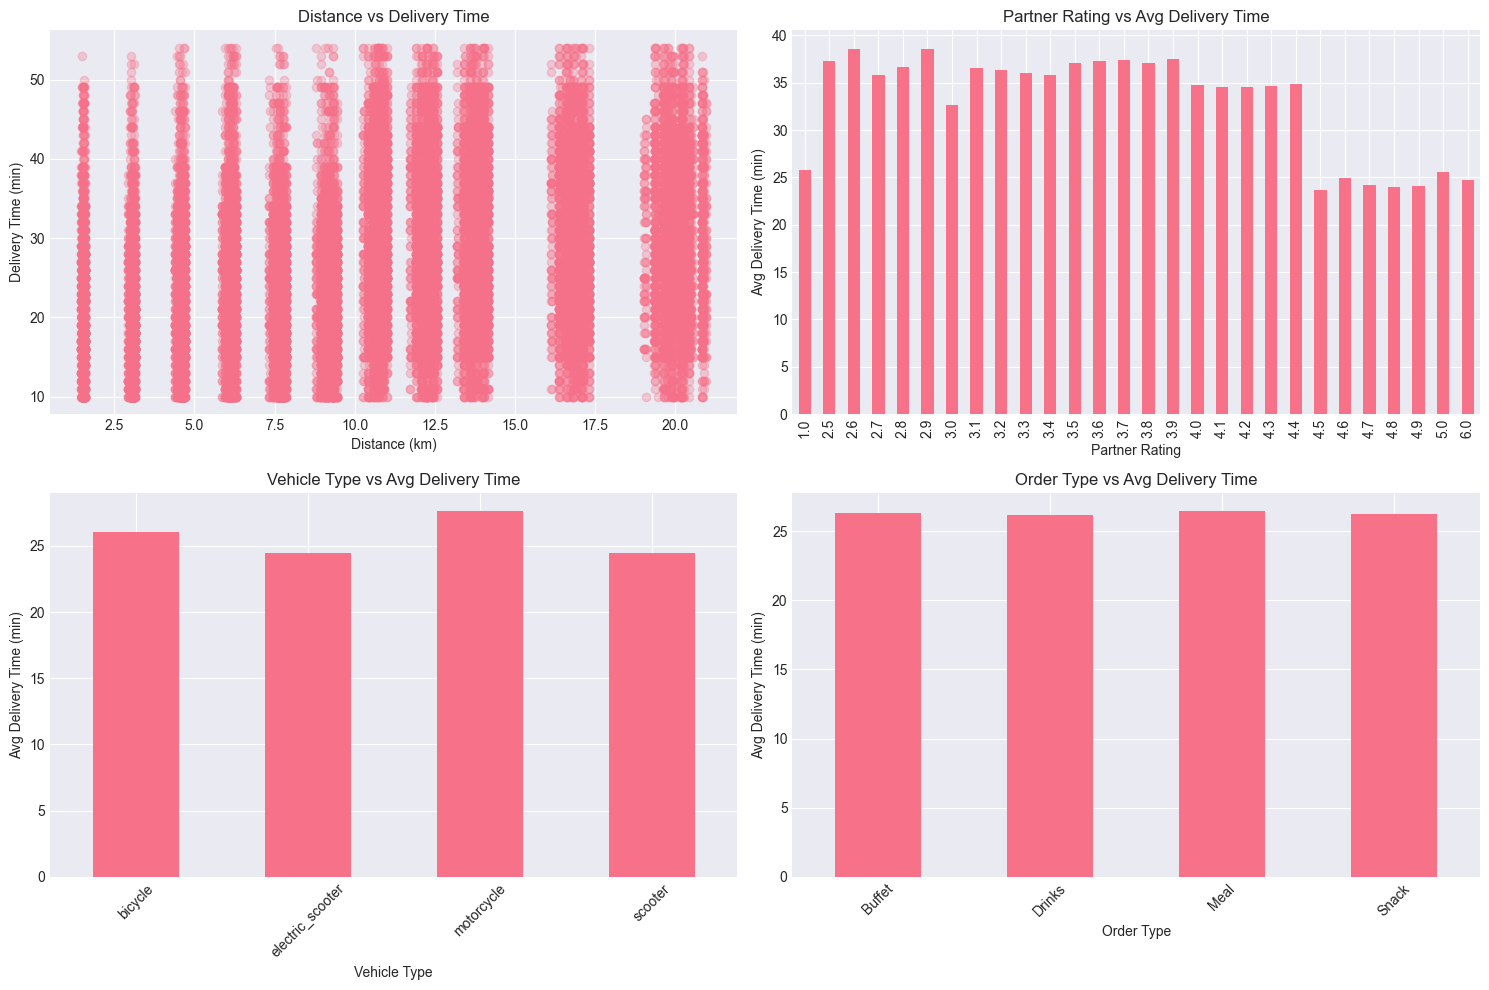

In [11]:
# Visualize key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distance vs Delivery Time
axes[0, 0].scatter(data['Distance_km'], data['Delivery_Time'], alpha=0.3)
axes[0, 0].set_xlabel('Distance (km)')
axes[0, 0].set_ylabel('Delivery Time (min)')
axes[0, 0].set_title('Distance vs Delivery Time')

# Partner Rating vs Delivery Time
data.groupby('Delivery_person_Ratings')['Delivery_Time'].mean().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Partner Rating')
axes[0, 1].set_ylabel('Avg Delivery Time (min)')
axes[0, 1].set_title('Partner Rating vs Avg Delivery Time')

# Vehicle Type vs Delivery Time
data.groupby('Type_of_vehicle')['Delivery_Time'].mean().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Vehicle Type')
axes[1, 0].set_ylabel('Avg Delivery Time (min)')
axes[1, 0].set_title('Vehicle Type vs Avg Delivery Time')
axes[1, 0].tick_params(axis='x', rotation=45)

# Order Type vs Delivery Time
data.groupby('Type_of_order')['Delivery_Time'].mean().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Order Type')
axes[1, 1].set_ylabel('Avg Delivery Time (min)')
axes[1, 1].set_title('Order Type vs Avg Delivery Time')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 🔢 Step 5: Encode Categorical Variables

In [12]:
# Label encode categorical features
le_order = LabelEncoder()
le_vehicle = LabelEncoder()

data['Order_Type_Encoded'] = le_order.fit_transform(data['Type_of_order'])
data['Vehicle_Type_Encoded'] = le_vehicle.fit_transform(data['Type_of_vehicle'])

print("✅ Categorical variables encoded!")
print(f"\nOrder Type Mapping:")
for i, order_type in enumerate(le_order.classes_):
    print(f"  {order_type}: {i}")

print(f"\nVehicle Type Mapping:")
for i, vehicle_type in enumerate(le_vehicle.classes_):
    print(f"  {vehicle_type}: {i}")

✅ Categorical variables encoded!

Order Type Mapping:
  Buffet: 0
  Drinks: 1
  Meal: 2
  Snack: 3

Vehicle Type Mapping:
  bicycle: 0
  electric_scooter: 1
  motorcycle: 2
  scooter: 3


## 🎯 Step 6: Prepare Features and Target

In [13]:
# Select features for modeling
feature_columns = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'Distance_km',
    'Order_Type_Encoded',
    'Vehicle_Type_Encoded',
    'Partner_Score',
    'Is_Experienced',
    'Is_HighRated',
    'Lat_Diff',
    'Lon_Diff'
]

X = data[feature_columns]
y = data['Delivery_Time']

print(f"✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"\n📊 Features used:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

✅ Feature matrix shape: (45162, 10)
✅ Target vector shape: (45162,)

📊 Features used:
  1. Delivery_person_Age
  2. Delivery_person_Ratings
  3. Distance_km
  4. Order_Type_Encoded
  5. Vehicle_Type_Encoded
  6. Partner_Score
  7. Is_Experienced
  8. Is_HighRated
  9. Lat_Diff
  10. Lon_Diff


In [14]:
# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Data split completed!")
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nSplit ratio: {X_train.shape[0]/X.shape[0]*100:.1f}% train / {X_test.shape[0]/X.shape[0]*100:.1f}% test")

✅ Data split completed!

Training set: 36129 samples
Test set: 9033 samples

Split ratio: 80.0% train / 20.0% test


In [15]:
# Feature scaling (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed!")

✅ Feature scaling completed!


## 🤖 Step 7: Train Multiple Models (Model Comparison)

In [16]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
}

print("🚀 Training multiple models...\n")

🚀 Training multiple models...



In [17]:
# Train and evaluate all models
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for linear models, original for tree-based
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    })
    
    print(f"  ✓ RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}\n")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('RMSE')

print("\n🏆 MODEL COMPARISON RESULTS:")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)

Training Linear Regression...
  ✓ RMSE: 7.73, MAE: 6.04, R²: 0.3327

Training Ridge Regression...
  ✓ RMSE: 7.73, MAE: 6.04, R²: 0.3327

Training Lasso Regression...
  ✓ RMSE: 7.75, MAE: 6.05, R²: 0.3305

Training Decision Tree...
  ✓ RMSE: 7.38, MAE: 5.79, R²: 0.3916

Training Random Forest...
  ✓ RMSE: 7.81, MAE: 6.09, R²: 0.3197

Training Gradient Boosting...
  ✓ RMSE: 7.24, MAE: 5.69, R²: 0.4147

Training XGBoost...
  ✓ RMSE: 7.38, MAE: 5.77, R²: 0.3921

Training LightGBM...
  ✓ RMSE: 7.25, MAE: 5.68, R²: 0.4137


🏆 MODEL COMPARISON RESULTS:
            Model     RMSE      MAE  R² Score
Gradient Boosting 7.242327 5.690554  0.414696
         LightGBM 7.248627 5.684542  0.413678
          XGBoost 7.381090 5.774276  0.392053
    Decision Tree 7.384043 5.786386  0.391566
Linear Regression 7.732786 6.036560  0.332737
 Ridge Regression 7.732800 6.036546  0.332735
 Lasso Regression 7.745556 6.046546  0.330531
    Random Forest 7.807782 6.094262  0.319732


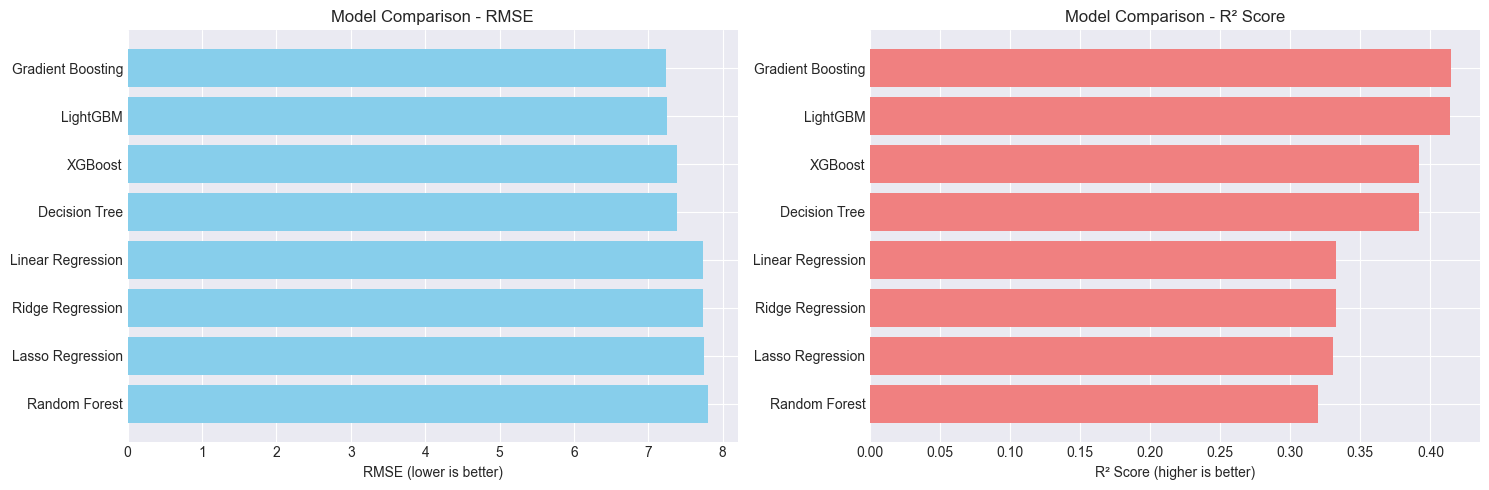


🏆 Best Model: Gradient Boosting
   RMSE: 7.24 minutes
   MAE: 5.69 minutes
   R² Score: 0.4147


In [18]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# RMSE comparison
axes[0].barh(results_df['Model'], results_df['RMSE'], color='skyblue')
axes[0].set_xlabel('RMSE (lower is better)')
axes[0].set_title('Model Comparison - RMSE')
axes[0].invert_yaxis()

# R² Score comparison
axes[1].barh(results_df['Model'], results_df['R² Score'], color='lightcoral')
axes[1].set_xlabel('R² Score (higher is better)')
axes[1].set_title('Model Comparison - R² Score')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"\n🏆 Best Model: {results_df.iloc[0]['Model']}")
print(f"   RMSE: {results_df.iloc[0]['RMSE']:.2f} minutes")
print(f"   MAE: {results_df.iloc[0]['MAE']:.2f} minutes")
print(f"   R² Score: {results_df.iloc[0]['R² Score']:.4f}")

## 🎯 Step 8: Fine-tune Best Model (Hyperparameter Tuning)

In [ ]:
# Let's fine-tune Random Forest (usually performs well)
print("🔧 Fine-tuning Random Forest model...\n")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1, verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✅ Best parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

🔧 Fine-tuning Random Forest model...

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\n🏆 FINE-TUNED MODEL PERFORMANCE:")
print("="*50)
print(f"RMSE: {rmse_best:.2f} minutes")
print(f"MAE: {mae_best:.2f} minutes")
print(f"R² Score: {r2_best:.4f}")
print("="*50)

## 📊 Step 9: Model Evaluation & Visualization

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Best Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n📊 Top 5 Most Important Features:")
print(feature_importance.head().to_string(index=False))

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (min)')
plt.ylabel('Predicted Delivery Time (min)')
plt.title('Actual vs Predicted Delivery Time')
plt.tight_layout()
plt.show()

In [ ]:
# Residual plot
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Delivery Time (min)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

print(f"\nMean Residual: {residuals.mean():.2f}")
print(f"Std Dev of Residuals: {residuals.std():.2f}")

## 💾 Step 10: Save Model and Encoders

In [ ]:
import pickle

# Save the model
with open('best_delivery_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save encoders
with open('order_encoder.pkl', 'wb') as f:
    pickle.dump(le_order, f)

with open('vehicle_encoder.pkl', 'wb') as f:
    pickle.dump(le_vehicle, f)

print("✅ Model and encoders saved successfully!")
print("\nSaved files:")
print("  - best_delivery_model.pkl")
print("  - scaler.pkl")
print("  - order_encoder.pkl")
print("  - vehicle_encoder.pkl")

## 🧪 Step 11: Test with Sample Predictions

In [ ]:
# Function to predict delivery time
def predict_delivery_time(age, rating, rest_lat, rest_lon, del_lat, del_lon, order_type, vehicle_type):
    """
    Predict delivery time for a new order
    """
    # Calculate distance
    distance = haversine_distance(rest_lat, rest_lon, del_lat, del_lon)
    
    # Engineer features
    partner_score = age * rating
    is_experienced = 1 if age > 30 else 0
    is_high_rated = 1 if rating >= 4.5 else 0
    lat_diff = abs(rest_lat - del_lat)
    lon_diff = abs(rest_lon - del_lon)
    
    # Encode categorical variables
    order_encoded = le_order.transform([order_type])[0]
    vehicle_encoded = le_vehicle.transform([vehicle_type])[0]
    
    # Create feature array
    features = np.array([[
        age, rating, distance, order_encoded, vehicle_encoded,
        partner_score, is_experienced, is_high_rated, lat_diff, lon_diff
    ]])
    
    # Predict
    prediction = best_model.predict(features)[0]
    
    return prediction, distance

# Test with sample data
print("🧪 Testing with sample predictions:\n")

sample_orders = [
    (25, 4.5, 12.9, 77.6, 13.0, 77.7, 'Snack', 'motorcycle'),
    (35, 4.8, 12.9, 77.6, 13.1, 77.8, 'Meal', 'scooter'),
    (28, 4.2, 12.9, 77.6, 12.95, 77.65, 'Drinks', 'electric_scooter'),
]

for i, (age, rating, r_lat, r_lon, d_lat, d_lon, order, vehicle) in enumerate(sample_orders, 1):
    pred_time, distance = predict_delivery_time(age, rating, r_lat, r_lon, d_lat, d_lon, order, vehicle)
    print(f"Order {i}:")
    print(f"  Partner: {age} years, Rating {rating}")
    print(f"  Distance: {distance:.2f} km")
    print(f"  Order Type: {order}, Vehicle: {vehicle}")
    print(f"  ⏱️  Predicted Time: {pred_time:.0f} minutes\n")

## 📝 Step 12: Summary Statistics for Presentation

In [ ]:
print("\n" + "="*70)
print("                    🏆 HACKATHON SUMMARY 🏆")
print("="*70)
print(f"\n📊 Dataset Overview:")
print(f"   Total Orders: {len(data):,}")
print(f"   Features Used: {len(feature_columns)}")
print(f"   Training Samples: {len(X_train):,}")
print(f"   Test Samples: {len(X_test):,}")

print(f"\n🎯 Best Model Performance:")
print(f"   Model: Random Forest (Fine-tuned)")
print(f"   RMSE: {rmse_best:.2f} minutes")
print(f"   MAE: {mae_best:.2f} minutes")
print(f"   R² Score: {r2_best:.4f}")

print(f"\n⚡ Key Insights:")
print(f"   Average Delivery Time: {data['Delivery_Time'].mean():.1f} min")
print(f"   Average Distance: {data['Distance_km'].mean():.2f} km")
print(f"   Most Important Feature: {feature_importance.iloc[0]['Feature']}")

print(f"\n🚀 Model Improvement:")
baseline_mae = data['Delivery_Time'].std()
improvement = (1 - mae_best/baseline_mae) * 100
print(f"   Improvement over baseline: {improvement:.1f}%")

print("\n" + "="*70)
print("                        ✅ READY FOR DEPLOYMENT!")
print("="*70)